In [2]:
import numpy as np                  
import matplotlib.pyplot as plt                     
import scipy as scp  
from scipy.optimize import curve_fit
import statistics as st
import sympy as sp 
from IPython.display import Latex

Frequency = 50.345268636668074


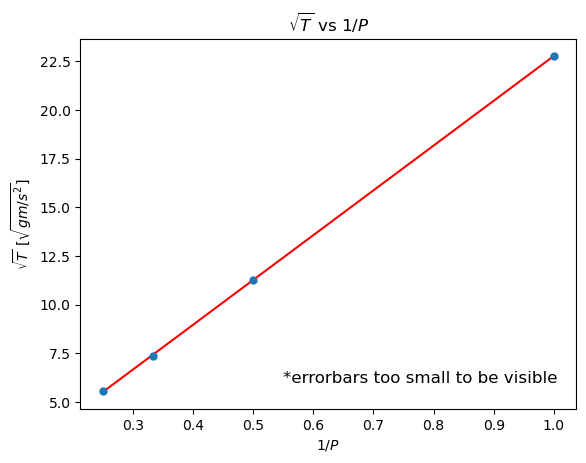

In [41]:
#Melde's Electronic Vibrator
P = np.array([1, 2, 3, 4])
M1 = np.array([52.9214, 12.9762, 5.5308, 3.1468])
g = 9.81
T1 = M1*g

a, b = np.polyfit(1/P, np.sqrt(T1), deg=1)

T1_error = (0.0001/M1)*T1

print('Frequency =', a/(2*0.522*np.sqrt(0.192)))

plt.errorbar(1/P, np.sqrt(T1), yerr=T1_error, ecolor='black', fmt='o', ms=5)
plt.plot(1/P, a*1/P+b, color='red')
plt.xlabel(r'$1/P$')
plt.ylabel(r'$\sqrt{T} \ [\sqrt{gm/s^2}$]')
plt.title(r'$\sqrt{T}$ vs $1/P$')
plt.text(0.55, 6, '*errorbars too small to be visible', fontsize=12)
plt.show()

Frequency = 47.9889071529698


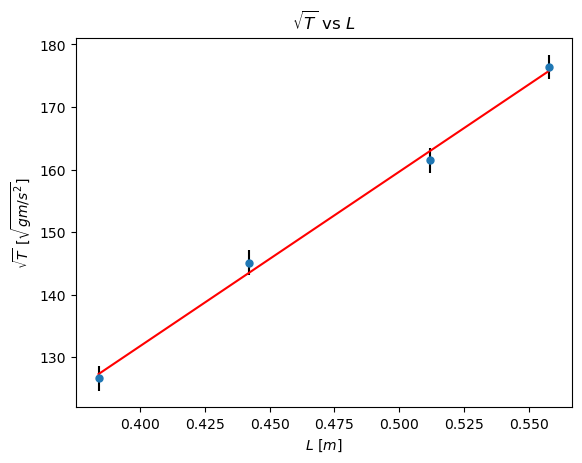

In [42]:
#Sonometer
L = np.array([0.384, 0.442, 0.512, 0.558])
M2 = np.array([1634.7, 2147.1, 2657.4, 3172.5])
g = 9.81
T2 = M2*g

p, q = np.polyfit(L, np.sqrt(T2), 1)

print('Frequency =', p/(4*np.sqrt(2.109)))

T2_error = (0.1/M2)*T2

plt.errorbar(L, np.sqrt(T2), yerr=2*T2_error, ecolor='black', fmt='o', ms=5)
plt.plot(L, p*L+q, color='red')
plt.xlabel(r'$L \ [m]$')
plt.ylabel(r'$\sqrt{T} \ [\sqrt{gm/s^2}$]')
plt.title(r'$\sqrt{T}$ vs $L$')
plt.show()

Speed of sound = 328.0702122681907 m/s


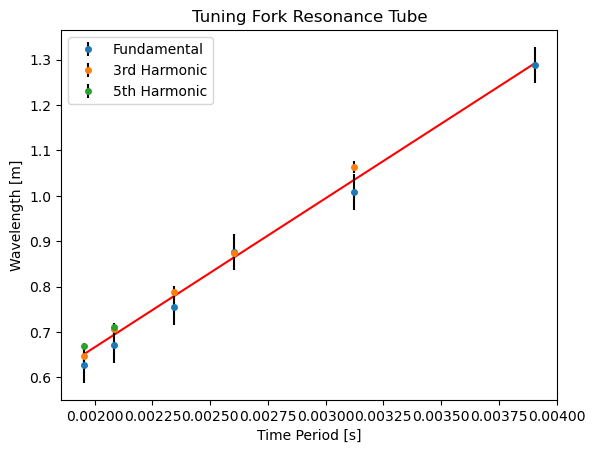

In [4]:
#Tuning Forks
f = np.array([256, 320, 384, 426.6, 480, 512])
l1 = np.array([0.322, 0.252, 0.219, 0.189, 0.168, 0.157])
l2 = np.array([0, 0.797, 0.656, 0.591, 0.530, 0.486])
l3 = np.array([0, 0, 0, 0, 0.889, 0.836])

T = 1/f
L1 = 4*l1
L2 = 4*l2/3
L3 = 4*l3/5

L1_err = np.array([0.004, 0.004, 0.004, 0.004, 0.004, 0.004])
L2_err = np.array([0.001*4/3, 0.001*4/3, 0.001*4/3, 0.001*4/3, 0.001*4/3, 0.001*4/3,])
L3_err = np.array([0.001*4/5, 0.001*4/5, 0.001*4/5, 0.001*4/5, 0.001*4/5, 0.001*4/5,])

T_fit = np.array([0.00390625, 0.003125, 0.00260417, 0.00234412, 0.00208333, 0.00195312, 
                  0.003125, 0.00260417, 0.00234412, 0.00208333, 0.00195312,
                  0.00208333, 0.00195312])

L_fit = np.array([1.288, 1.008,  0.876,  0.756,  0.672,  0.628,
                  1.0626666667,  0.8746666667,  0.788, 0.7066666667, 0.648, 
                  0.7112, 0.6688])

a, b = np.polyfit(T_fit, L_fit, 1)

print('Speed of sound =', a, 'm/s')

plt.plot(T, a*T+b, color='red')
plt.errorbar(T, L1, yerr=10*L1_err, ecolor='black', ms=4, fmt='o', label='Fundamental')
plt.errorbar(T[1:], L2[1:], yerr=10*L2_err[1:], ecolor='black', ms=4, fmt='o', label='3rd Harmonic')
plt.errorbar(T[4:], L3[4:], yerr=10*L3_err[4:], ecolor='black', ms=4, fmt='o', label='5th Harmonic')
plt.title('Tuning Fork Resonance Tube')
plt.xlabel(r'Time Period [s]')
plt.ylabel(r'Wavelength [m]')
plt.legend()
plt.show()

Speed of sound = 325.32422558131736 m/s


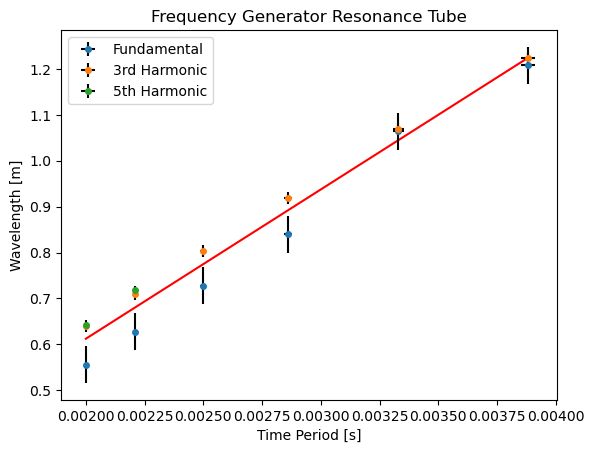

In [33]:
#Frequency Generator
f = np.array([257.7, 300.3, 349.6, 400.0, 452.4, 500.0])
l1 = np.array([0.302, 0.266, 0.210, 0.182, 0.157, 0.139])
l2 = np.array([0.918, 0.802, 0.689, 0.603, 0.533, 0.480])
l3 = np.array([0, 0, 0, 0, 0.898, 0.802])

T = 1/f
L1 = 4*l1
L2 = 4*l2/3
L3 = 4*l3/5

T_err = (0.2/f)*T
L1_err = np.array([0.004, 0.004, 0.004, 0.004, 0.004, 0.004])
L2_err = np.array([0.001*4/3, 0.001*4/3, 0.001*4/3, 0.001*4/3, 0.001*4/3, 0.001*4/3,])
L3_err = np.array([0.001*4/5, 0.001*4/5, 0.001*4/5, 0.001*4/5, 0.001*4/5, 0.001*4/5,])

T_fit = np.array([0.00388048, 0.00333, 0.00286041, 0.0025, 0.00221043, 0.002,
                  0.00388048, 0.00333, 0.00286041, 0.0025, 0.00221043, 0.002,
                  0.00221043, 0.002,])

L_fit = np.array([1.208, 1.064, 0.84, 0.728, 0.628, 0.556,
                  1.224, 1.06933333, 0.91866667, 0.804, 0.71066667, 0.64,
                  0.7184, 0.6416])

p, q = np.polyfit(T_fit, L_fit, 1)

print('Speed of sound =', p, 'm/s')

plt.plot(T, p*T+q, color='red')
plt.errorbar(T, L1, xerr=10*T_err, yerr=10*L1_err, ecolor='black', ms=4, fmt='o', label='Fundamental')
plt.errorbar(T, L2, xerr=10*T_err, yerr=10*L2_err, ecolor='black', ms=4, fmt='o', label='3rd Harmonic')
plt.errorbar(T[4:], L3[4:], xerr=10*T_err[4:], yerr=10*L3_err[4:], ecolor='black', ms=4, fmt='o', label='5th Harmonic')
plt.title('Frequency Generator Resonance Tube')
plt.xlabel(r'Time Period [s]')
plt.ylabel(r'Wavelength [m]')
plt.legend()
plt.show()